# Gradient Descent

Gradient descent is a multi-purpose algorithm that is often used to find coefficient estimates for other more specific algorithms.

## What we will accomplish

In this notebook we will:
- Remind ourselves of some calculus,
- Discuss some extensions of simple gradient descent and
- Show how to implement gradient descent.

In [1]:
## For data handling
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

## The gradient

As a quick refresher from calculus III let's remind ourselves of the <i>gradient</i>.

The gradient of a differentiable function, $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is given by:

$$
\nabla f = \left( f_1, f_2, \dots, f_n \right),
$$

where $f_i$ denotes the partial derivative of $f$ with respect $x_i$, the independent variable denoting the $i^\text{th}$ dimension.

### Direction of quickest increase/decrease

It is a fact from calculus that for any point, $x^*$, the direction of the vector $\nabla f(x^*)$ is the direction in which $f$ most rapidly increases (for a proof see <a href="https://tutorial.math.lamar.edu/Classes/CalcIII/DirectionalDeriv.aspx#Gradient_Defn">https://tutorial.math.lamar.edu/Classes/CalcIII/DirectionalDeriv.aspx#Gradient_Defn</a>). Conversely, the direction of the vector $-\nabla f(x^*)$ is the direction in which $f$ most rapidly decreases.

We will exploit this latter fact.

### Gradient descent

Many of our supervised learning algorithms are fit by minimizing some loss function, $\ell$. For linear regression this loss function was the mean squared error:

$$
\ell_{LR}(\beta) = \frac{1}{n} \sum_{i=1}^n \left( y^{(i)} - X^{(i)} \beta  \right)^2.
$$

While we can at times find explicit formulae for parameters that minimize $\ell$, this is not always possible or may be too time consuming (computational time). 

The <i>gradient descent</i> algorithm offers an alternative approach in which we look to minimize the cost function using its gradient.

Suppose $\ell$ is a function of some parameters stored in a vector $\beta$. Then gradient descent follows these steps:

1. Make an initial guess for $\hat{\beta}$ call it $\beta^*$ (this can be random),
2. Calculate $\nabla \ell(\beta^*)$,
3. Update your guess for $\hat{\beta}$ by:
    $$
        \beta^*_{\text{updated}} = \beta^* - \alpha \nabla f(\beta^*),
    $$
4. Repeat steps 2. and 3. until you have reached a certain number of steps or until $||\beta^*_{\text{updated}} - \beta^* ||< \text{tol}$, for some tolerance level.

The $\alpha$ above is known as the <i>learning rate</i> and is set before running gradient descent (more on this hyperparameter later).

#### Example: Implementing for regression

For linear regression we have:

$$
\nabla \ell_{LR}(\beta) = \frac{2}{n} X^T \left( X \beta - y \right).
$$

We can use this to program a gradient descent approach to the following regression problem.

In [4]:
## Generating some data
np.random.seed(431)

n = 200
X = np.ones((n,2))
X[:,1] = 3*np.random.randn(n)

## y = 2 + 7x + epsilon
y = 2*X[:,0] + 7*X[:,1] + 4*np.random.randn(n)

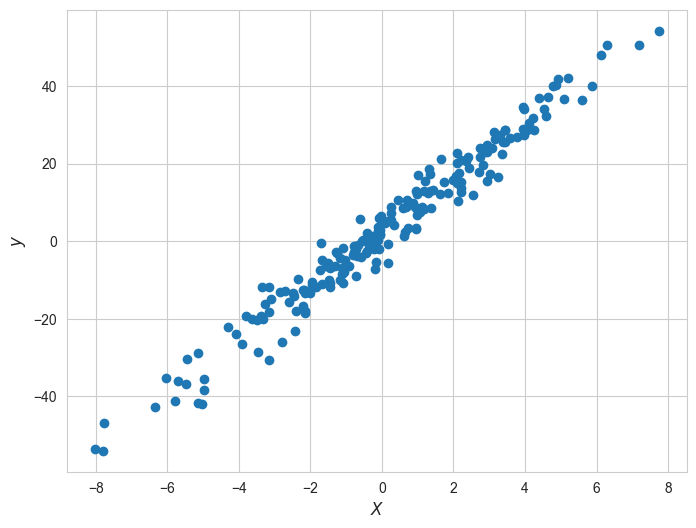

In [5]:
plt.figure(figsize=(8,6))

plt.scatter(X[:,1], y)

plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

In [10]:
## programming gradient descent

## learning rate
alpha = .05

## initial guess
beta_star = np.random.random((2,1))

## setting a tolerance
tol = .00000001

## limit to 50000 iterations
max_iter = 50000

for i in range(max_iter):
    ## update = current - alpha*gradient
    beta_star_new = beta_star - alpha*(2/n)*X.transpose().dot(X.dot(beta_star) - y.reshape(-1,1))
    
    ## check to see if the change in estimate is beneath the tolerance
    if np.sum(np.power(beta_star_new - beta_star,2))/2 < tol:
        ## if it is we have beta_hat
        beta_hat = beta_star_new
        break
    
    else:
        beta_star = beta_star_new
        
    if i + 1 == max_iter:
        print("Maximum iterations reached before convergence.")
        
print("Went through", i, "iterations")
print("beta_hat =")
print(beta_hat)

Went through 70 iterations
beta_hat =
[[2.30276966]
 [6.96879854]]


We can compare this to what we would get using the normal equation.

In [8]:
np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

array([2.30395419, 6.96877809])

The gradient descent approach may be preferable if you are working with a data set with a large number of features because unlike the normal equation it does not require the computation of an inverse, which can be computationally intensive.

### Standard adjustments to gradient descent

There are a couple of adjustments that get made to gradient descent.

#### Mini-batch gradient descent

<i>Mini-batch gradient descent</i> involves randomly splitting the training set into smaller subsets known as "mini-batches". When performing gradient descent you then calculate the gradient by cycling through these random subsets instead of using the entire training set. For example, if your mini-batches were one tenth of the entire training set the first time through gradient descent loop you would use the first mini-batch to calculate the gradient, the second time through you would use the second mini-batch and so on. When you have used all of the mini-batches (known as completing an <i>epoch</i>), you start the cycle again with mini-batch 1.

Mini-batch descent is used to cut down on computation time.

#### Stochastic gradient descent

<i>Stochastic gradient descent</i> involves randomly generating a learning rate ($\alpha$) each time through the update step.

This is done to avoid having your estimate get stuck in a sub-optimal local minimum, which can occur when your cost function has many local minima. The hope is that a random learning rate will at times be large enough so that the estimate randomly leaves the valley of a local minimum and moves closer to the global minimum.

Note stochastic gradient descent algorithms can be used to solve regression and classification problems in `sklearn`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html</a>.

In [11]:
from sklearn.linear_model import SGDRegressor

In [12]:
## Make the model object
## Note that by default SGD included a regularization penalty
## We also do not need the intercept here
reg = SGDRegressor(penalty=None,
                   fit_intercept=False,
                   tol=tol,
                   max_iter=max_iter)

## fit the model
reg.fit(X, y)

## look at the coef
reg.coef_

array([2.30506101, 6.88190268])

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)